# Importing Necessary Libraries

In [5]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt

# Mounting Google Drive

In [3]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


# Reading the streamflow values for stations with stationary and non zero streamflow values for time 1975-2014

In [8]:
path = '/content/drive/MyDrive/Camels Aus Data/Project files/streamflow_values.csv'
sf_values = pd.read_csv(path)
sf_values = sf_values.drop(columns = ['Unnamed: 0'])
# sf_quantiles.rename(columns = {'Station':'station_id'}, inplace = True)
sf_values.head()

,915011A,919003A,919201A,919309A,922101B,925001A,926002A,G9030124,G9030250,G9070142,...,304499,305202,307473,308145,308799,312061,314207,314213,315450,318076
0,82.780489,474.874276,174.983834,711.426002,140.727109,796.445134,96.162232,20.463312,739.141103,961.993843,...,105.706499,10.947117,541.483803,702.487402,138.861322,45.200637,204.064666,88.438439,318.613702,69.022938
1,63.181077,1163.464776,333.626337,557.296202,186.380752,803.262220,111.527180,27.847303,4291.129944,600.857266,...,22.691637,5.454757,400.551835,567.257944,144.547779,27.681073,95.652281,72.701618,141.405345,27.574476
2,34.213670,2787.459012,205.827386,1824.826284,60.288619,688.102078,36.768862,15.138561,2445.424164,921.572806,...,24.233873,4.964413,282.017871,336.861270,146.540949,15.218421,109.417703,62.479461,110.996628,42.028782
3,5.595450,494.906555,159.698052,349.679475,75.358314,284.095404,65.612775,29.770990,611.380346,66.542630,...,16.011819,3.990414,441.044631,287.486586,136.151061,13.626996,107.551048,75.293037,90.595832,45.791142
4,63.547278,7450.901388,578.469677,1503.196398,434.815504,973.868767,210.687309,10.329841,307.134608,254.626843,...,21.015838,1.491287,398.660643,381.880658,146.897457,17.976505,174.094951,98.649600,114.492670,36.450924


In [9]:
years = list(range(1975, 2015))
sf_values.index = years
sf_values.head()

,915011A,919003A,919201A,919309A,922101B,925001A,926002A,G9030124,G9030250,G9070142,...,304499,305202,307473,308145,308799,312061,314207,314213,315450,318076
1975,82.780489,474.874276,174.983834,711.426002,140.727109,796.445134,96.162232,20.463312,739.141103,961.993843,...,105.706499,10.947117,541.483803,702.487402,138.861322,45.200637,204.064666,88.438439,318.613702,69.022938
1976,63.181077,1163.464776,333.626337,557.296202,186.380752,803.262220,111.527180,27.847303,4291.129944,600.857266,...,22.691637,5.454757,400.551835,567.257944,144.547779,27.681073,95.652281,72.701618,141.405345,27.574476
1977,34.213670,2787.459012,205.827386,1824.826284,60.288619,688.102078,36.768862,15.138561,2445.424164,921.572806,...,24.233873,4.964413,282.017871,336.861270,146.540949,15.218421,109.417703,62.479461,110.996628,42.028782
1978,5.595450,494.906555,159.698052,349.679475,75.358314,284.095404,65.612775,29.770990,611.380346,66.542630,...,16.011819,3.990414,441.044631,287.486586,136.151061,13.626996,107.551048,75.293037,90.595832,45.791142
1979,63.547278,7450.901388,578.469677,1503.196398,434.815504,973.868767,210.687309,10.329841,307.134608,254.626843,...,21.015838,1.491287,398.660643,381.880658,146.897457,17.976505,174.094951,98.649600,114.492670,36.450924


In [17]:
sf_values.shape

(40, 177)

# Reading the Precipitation Values for Stations with stationary and non zero streamflow timeseries

In [11]:
path = '/content/drive/MyDrive/Camels Aus Data/Project files/precipitation_values.csv'
prec_values = pd.read_csv(path)
# prec_values = prec_values.drop(columns = ['Unnamed: 0'])
# sf_quantiles.rename(columns = {'Station':'station_id'}, inplace = True)
prec_values.head()

,year,915011A,919003A,919201A,919309A,922101B,925001A,926002A,G9030124,G9030250,...,304499,305202,307473,308145,308799,312061,314207,314213,315450,318076
0,1975,47.782392,59.667382,84.595217,39.620311,71.638004,50.311008,96.709917,48.920840,41.905364,...,77.448470,50.034210,93.541855,85.572185,85.827055,64.008920,59.645855,46.997372,69.136323,50.418912
1,1976,135.400668,58.442793,70.014517,32.431909,57.523468,61.652404,85.650872,68.387856,106.900762,...,76.481658,47.836842,76.435455,70.005557,68.631936,38.224648,39.376980,30.774599,43.793050,37.454388
2,1977,57.841838,74.070346,108.339822,76.047862,63.565325,79.030198,67.780625,56.617841,34.553186,...,59.221507,58.664473,60.108824,48.243955,49.977654,64.128170,63.190968,68.150146,71.914050,36.681026
3,1978,46.531519,66.706378,83.644883,34.506643,83.023642,69.135996,85.229844,85.935831,52.115997,...,44.082533,41.435527,54.098837,56.002749,58.862928,54.938733,50.940806,43.453212,55.236398,56.206057
4,1979,67.201848,136.915259,159.395385,84.284915,239.727320,143.460940,155.881264,31.810344,67.185084,...,59.649125,38.347369,57.120491,53.063405,52.432877,64.412676,76.978277,55.592847,78.792376,34.971694


In [16]:
prec_values.shape

(40, 177)

### Processing

In [14]:
prec_values.index = prec_values['year']
prec_values.drop(columns = ['year'],inplace = True)
prec_values.head()

,915011A,919003A,919201A,919309A,922101B,925001A,926002A,G9030124,G9030250,G9070142,...,304499,305202,307473,308145,308799,312061,314207,314213,315450,318076
year,,,,,,,,,,,,,,,,,,,,,
1975,47.782392,59.667382,84.595217,39.620311,71.638004,50.311008,96.709917,48.920840,41.905364,92.138000,...,77.448470,50.034210,93.541855,85.572185,85.827055,64.008920,59.645855,46.997372,69.136323,50.418912
1976,135.400668,58.442793,70.014517,32.431909,57.523468,61.652404,85.650872,68.387856,106.900762,45.491424,...,76.481658,47.836842,76.435455,70.005557,68.631936,38.224648,39.376980,30.774599,43.793050,37.454388
1977,57.841838,74.070346,108.339822,76.047862,63.565325,79.030198,67.780625,56.617841,34.553186,61.146848,...,59.221507,58.664473,60.108824,48.243955,49.977654,64.128170,63.190968,68.150146,71.914050,36.681026
1978,46.531519,66.706378,83.644883,34.506643,83.023642,69.135996,85.229844,85.935831,52.115997,38.669711,...,44.082533,41.435527,54.098837,56.002749,58.862928,54.938733,50.940806,43.453212,55.236398,56.206057
1979,67.201848,136.915259,159.395385,84.284915,239.727320,143.460940,155.881264,31.810344,67.185084,47.736974,...,59.649125,38.347369,57.120491,53.063405,52.432877,64.412676,76.978277,55.592847,78.792376,34.971694


# Plotting the annual max precipitation and streamflow timeseries for a random station for 40 years

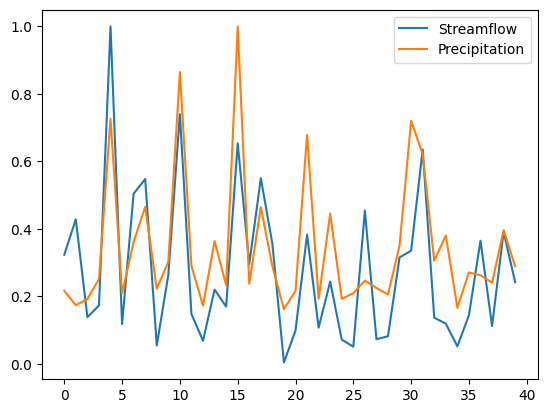

In [25]:
station = '922101B'
sf = sf_values[station]/np.max(sf_values[station])
prec = prec_values[station]/np.max(prec_values[station])
plt.plot(np.arange(40),sf,label = 'Streamflow')
plt.plot(np.arange(40),prec,label = 'Precipitation')
plt.legend()
plt.show()

# Finding and plotting the correlations between the Annual Max Precipitation and Streamflow timeseries for all the stations

In [29]:
correlations = []
for col in cols:
  correlations.append(np.corrcoef(sf_values[col],prec_values[col])[0][1])

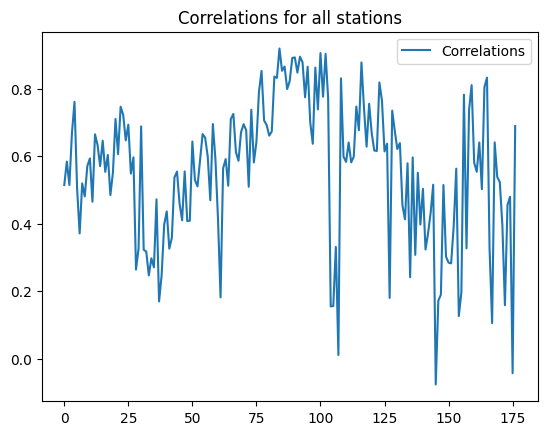

Average Correlation between Annual Max Streamflow and Precipitation timeseries for all stations is 
0.5595434124535256


In [34]:
plt.plot(np.arange(177),correlations,label = 'Correlations')
plt.legend()
plt.title('Correlations for all stations')
plt.show()
print(f"Average Correlation between Annual Max Streamflow and Precipitation timeseries for all stations is \n{np.mean(correlations)}")

# Columns that have nonzero and stationary streamflow timeseries from 1975-2014

In [28]:
cols = ['915011A',
'919003A',
'919201A',
'919309A',
'922101B',
'925001A',
'926002A',
'G9030124',
'G9030250',
'G9070142',
'A0020101',
'A0030501',
'401009',
'401012',
'401203',
'401208',
'401210',
'401212',
'401216',
'401217',
'402204',
'402206',
'402213',
'402217',
'403209A',
'403213A',
'403214',
'403217',
'403226',
'403232',
'404207',
'405205',
'405209',
'405215',
'405217',
'405218',
'405219',
'405226',
'405238',
'405245',
'405251',
'405263',
'405274',
'406208',
'406213',
'406214',
'407214',
'407215',
'407253',
'408202',
'410057',
'410061',
'410705',
'410730',
'410731',
'410761',
'412028',
'412050',
'412066',
'415207',
'416003',
'416008',
'418005',
'418014',
'419005',
'422202B',
'422313B',
'422334A',
'422394A',
'424002',
'424201A',
'102101A',
'104001A',
'105101A',
'105102A',
'105105A',
'107001B',
'108002A',
'108003A',
'112002A',
'112102A',
'113004A',
'116006B',
'116010A',
'116011A',
'116012A',
'116013A',
'121001A',
'122004A',
'126003A',
'137101A',
'137201A',
'138009A',
'138113A',
'143009A',
'143303A',
'145010A',
'145018A',
'145101D',
'145107A',
'146010A',
'146012A',
'146014A',
'146095A',
'A5030502',
'A5040517',
'A5040523',
'A5130501',
'204034',
'206014',
'206018',
'208007',
'208009',
'210006',
'210011',
'211008',
'212209',
'212260',
'215002',
'215004',
'215207',
'216002',
'216004',
'218001',
'219001',
'221207',
'221210',
'222213',
'223202',
'224206',
'224213A',
'224214A',
'225020A',
'225110A',
'225219',
'226220',
'226222',
'226407',
'227225A',
'227226',
'227227',
'229661A',
'231213',
'235205',
'238208',
'A2390523',
'604053',
'606001',
'606002',
'606185',
'607155',
'608002',
'610008',
'613146',
'616013',
'803003',
'804001',
'G8110004',
'G8110016',
'G8140001',
'G8140161',
'G8170002',
'G8190001',
'G8200045',
'G8210010',
'302214',
'304497',
'304499',
'305202',
'307473',
'308145',
'308799',
'312061',
'314207',
'314213',
'315450',
'318076']